Pra rodar as células usa o comando SHIFT + ENTER

O objetivo dessa primeira célula é criar permissão pra utilizar o drive. 
Quando rodar a célula será gerado um link. 
Basta clicar no link e fazer login com sua conta do google.
Copia o texto que aparecer e cola no na caixa que aparecer depois dessa célula. ENTER

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
from collections import OrderedDict, Counter
import os
import networkx as nx
import matplotlib.pyplot as plt
from nltk import word_tokenize
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Nessa parte escolhemos a data que será utilizada. Fica a vontade pra mudar.

In [3]:
df = pd.read_csv('/content/drive/My Drive/Projeto Ana/Utils/Análise 2020/tweets_total.csv', encoding = 'utf-8')   

df = df[(df['date'] > '2015-07-01 00:00:00') & (df['date'] < '2015-09-30 09:00:00')]
df = df.dropna()

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
#df[df['username']=='blogdilmabr'].sort_values(by = 'retweets_count', ascending= False)
print(df[df['Unnamed: 0']=='269316']['tweet'].values[0])

Balança comercial acumula saldo positivo de US$ 7,3 bi  http://www.blogdilmabr.com/balanca-comercial-acumula-saldo-positivo-de-us-73-bi-portal-brasil/ … #ConfioEmDilma #GovernoDilma  pic.twitter.com/3Sc3izY97n


In [7]:
df.sort_values(by = 'retweets_count', ascending=False)

,Unnamed: 0,id,date,username,name,tweet,retweets_count,likes_count
1032152,296303,6.218730e+17,2015-07-17,diegoescosteguy,Diego Escosteguy,"URGENTE O presidente da Câmara, Eduardo Cunha,...",458.0,267.0
1033690,297842,6.201634e+17,2015-07-12,blogdopim,Felipe Moura Brasil,Governo Dilma planeja golpe no STF para anular...,435.0,328.0
1020942,285093,6.298196e+17,2015-08-08,revistaistoe,Revista ISTOÉ,Movimentos se organizam para fazer maior prote...,359.0,284.0
1016922,281072,6.328938e+17,2015-08-16,jornaloglobo,Jornal O Globo,Opositores ao governo Dilma vão às ruas neste ...,357.0,593.0
1004303,268453,6.417698e+17,2015-09-10,jornaloglobo,Jornal O Globo,.@MiriamLeitaoCom: 'Perda do grau de investime...,306.0,309.0
1007855,272007,6.374369e+17,2015-08-29,diegoescosteguy,Diego Escosteguy,"Daqui a pouco, os telegramas secretos da Embai...",299.0,197.0
1001925,266075,6.435409e+17,2015-09-14,ronaldocaiado,Ronaldo Caiado,Brasileiro não aguenta mais pagar impostos. Es...,294.0,266.0
1014016,278166,6.333248e+17,2015-08-17,folha,Folha de S.Paulo,País vê governo Dilma como 'ilegítimo' e renún...,275.0,306.0
1005068,269219,6.408873e+17,2015-09-07,mendoncafilho,Mendonça Filho,"A imagem do Governo Dilma/PT: isolado do povo,...",274.0,193.0
1004388,268538,6.417309e+17,2015-09-09,blogdofavre,Luis Favre,"""Governo Dilma gerou 5 milhões de empregos. Fo...",272.0,154.0


###Palavras mais frequentes

In [ ]:
def word_transform(words):
    words = words.split()
    total = [x.lower() for x in words]
    manual_list_stop_words = ['só','disse','ser','sobre','ainda','se','além', 'outros','porque','assim','ter', 'access_time', 'more_horiz',
                             'out','jun','publicado','diz','exame','patrocinado','ago','vip','abr','http','vai','HTTP'
                             'jul','jan','abr','set','nov','dez','conteúdo','mar','maio','estadão','marketing','pictwittercom','dia','mil','pra',
                             'fev','paulo', 'the','após', 'redação', 'foto', 'feira', 'segundo', 'nesta', 'sexta','contra','governo','dilma'
            'onde','pode','sábado','segunda','três', 'fazer','todos','parte','local', 'região', 'disse','quarta','nova','novo',
            'via','veja','neste','nm','aponta','mostra','rt','vejaabrilcombr','folha','vai','desde','do','multimidia','vejacom','blog', '-', '@','"','...','dilma']
    stop_words = stopwords.words('portuguese')
    for i in manual_list_stop_words:
        stop_words.append(i)
    
    total = [x for x in total if x not in stop_words]
    total = [re.sub(r'[,\.!?()]', '', x) for x in total]
    total = [x for x in total if not re.search(r"\d", x)]
    
    long_string = (" ").join(total)
    return long_string

In [ ]:
df['tweet'] = df['tweet'].apply(word_transform)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


In [ ]:
import operator
lista = df['tweet'].values.tolist()

flat_list = reduce(operator.concat, lista)
flat_list = flat_list.split()

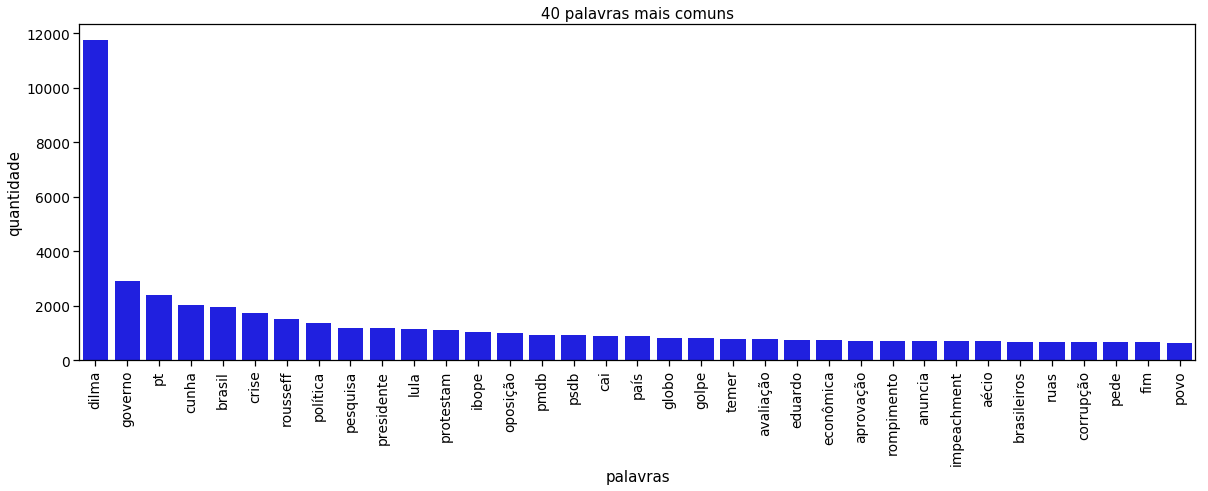

In [ ]:
def plot_n_most_common_words(count_data, count_vectorizer, n):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:n]
    del count_dict[1]
    del count_dict[16]
    del count_dict[22]
    del count_dict[-4]
    del count_dict[-9]


    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(20, 10/1.6180))
    plt.subplot(title='{} palavras mais comuns'.format(n))
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, color = 'blue')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('palavras')
    plt.ylabel('quantidade')
    plt.show()

count_vectorizer = CountVectorizer()

count_data = count_vectorizer.fit_transform(flat_list)
                                               
plot_n_most_common_words(count_data, count_vectorizer,40)

### Gráfico de centralidade e co-ocorrência

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Projeto Ana/Análise 2020/tweets_total.csv', encoding = 'utf-8')

df = df[(df['date'] > '2015-07-01 00:00:00') & (df['date'] < '2015-09-30 09:00:00')]
df = df.dropna()

In [ ]:
df_centralidade = df[['tweet']]

In [ ]:
df_centralidade['tweet'] = df_centralidade['tweet'].apply(word_transform)

texto_sem_tags = ' '.join(df_centralidade['tweet'].tolist())


l_sem_stopwords = texto_sem_tags.split()
t_sem_stopwords = u' '.join(l_sem_stopwords)

lista_tweets = df_centralidade['tweet'].tolist()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def polariza_counter(dicionario, df1, df2):
    polaridades = []
    fator_div = 0
    ausentes = []
    for palavra, frequencia in dicionario.items():
        p = palavra.lower().strip()
        if p in df1.index:
            polaridades.append(df1.polaridade[p] * frequencia)
            fator_div += frequencia
        elif p in df2.index:
            polaridades.append(df2.polaridade[p] * frequencia)
            fator_div += frequencia
        else:
            ausentes.append((palavra,frequencia))
    num_pal = len(dicionario)
    num_pol = len(polaridades)
    razao_pol = num_pol/float(num_pal) if num_pal else 0.0
    polaridade = sum(polaridades)/float(fator_div)

    return polaridade, ausentes

freq_words = Counter(l_sem_stopwords)

w_items = freq_words.items()
w_items.sort(key = lambda wc: wc[1])

datapath = '/content/drive/My Drive/Projeto Ana/Análise 2020/'
oplexicon = 'oplexicon_v3.0/lexico_v3.0.txt'
sentilex1 = 'SentiLex-PT02/SentiLex-lem-PT02.txt'
sentilex2 = 'SentiLex-PT02/SentiLex-flex-PT02.txt'

df_o = pd.read_csv(os.path.join(datapath,oplexicon), header=None, encoding='utf-8', usecols=[0,2], names=[u'palavra',u'polaridade'])
df_o.drop_duplicates(subset=[u'palavra'],  inplace=True)
df_o = df_o.set_index(u'palavra')

df_s1 = pd.read_csv(os.path.join(datapath,sentilex1), header=None, encoding='utf-8', delimiter='.', names=[u'palavra',u'polaridade'])
conserta_pol1 = lambda x: int(x.split(';')[2].split('=')[1])
df_s1.polaridade = df_s1.polaridade.apply(conserta_pol1)
df_s1.drop_duplicates(subset=[u'palavra'], inplace=True)
df_s1 = df_s1.set_index(u'palavra')

In [ ]:
def all_pairs(items):
    pairs = []
    nitems = len(items)
    for i, wi in enumerate(items):
        for j in range(i+1, nitems):
            pairs.append((wi, items[j]))
    return pairs

def co_occurrences(lines, words):
 
    wpairs = all_pairs(words)

    co_occur = {}
    for w1, w2 in wpairs:
        rx = re.compile('%s .*%s|%s .*%s' % (w1, w2, w2, w1))
        co_occur[w1, w2] = sum([1 for line in lines if rx.search(line)])

    return co_occur

def co_occurrences_graph(word_hist, co_occur, cutoff=0):
    g = nx.Graph()
    for word, count in word_hist:
        g.add_node(word, count=count)
    for (w1, w2), count in co_occur.iteritems():
        if count<=cutoff:
            continue
        g.add_edge(w1, w2, weight=count)
    return g

In [ ]:
n_nodes = 12
popular = w_items[-n_nodes:]
pop_words = [wc[0] for wc in popular]
co_occur = co_occurrences(lista_tweets, pop_words)
wgraph = co_occurrences_graph(popular, co_occur, cutoff=1)
wgraph = list(nx.connected_component_subgraphs(wgraph))[0]
centrality = nx.eigenvector_centrality_numpy(wgraph)
c = centrality.items()
c.sort(key=lambda x:x[1], reverse=True)

In [ ]:
rad0 = 0.2
def rescale_arr(arr, amin, amax):
    
    m = arr.min()
    M = arr.max()
 
    s = float(amax-amin)/(M-m)
    d = amin - s*m

    
    return np.clip(s*arr+d,amin,amax)

def plot_graph(wgraph, pos=None, fig=None, title=None):
 
    edge_min_width= 3
    edge_max_width= 12
    label_font = 16
    node_font = 18
    node_alpha = 0.4
    edge_alpha = 0.55
    edge_cmap = plt.cm.Spectral

 
    if fig is None:
        fig, ax = plt.subplots()
    else:
        ax = fig.add_subplot(111)
    fig.subplots_adjust(0,0,1)

  
    sizes = []
    degrees = []
    for n, d in wgraph.nodes(data=True):
        sizes.append(d['count'])
        degrees.append(wgraph.degree(n))

    sizes = rescale_arr(np.array(sizes, dtype=float), 100, 1000)

    
    pos = nx.spring_layout(wgraph) if pos is None else pos
    labels = {}
    width = []
    for n1, n2, d in wgraph.edges(data=True):
        w = d['weight']
        labels[n1, n2] = w
        width.append(w)

    width = rescale_arr(np.array(width, dtype=float), edge_min_width, 
                        edge_max_width)

    nx.draw_networkx_nodes(wgraph, pos, node_size=sizes, node_color=degrees,
                           alpha=node_alpha)
    nx.draw_networkx_edges(wgraph, pos, width=width, edge_color=width,
                           edge_cmap=edge_cmap, alpha=edge_alpha)
    nx.draw_networkx_edge_labels(wgraph, pos, edge_labels=labels, 
                                 font_size=label_font)
    nx.draw_networkx_labels(wgraph, pos, font_size=node_font, font_weight='bold')
    if title is not None:
        ax.set_title(title, fontsize=label_font)
    ax.set_xticks([])
    ax.set_yticks([])

    # Mark centrality axes
    kw = dict(color='k', linestyle='-')
    cross = [ax.axhline(0, **kw), ax.axvline(rad0, **kw)]
    [ l.set_zorder(0) for l in cross]
    
def centrality_layout(wgraph, centrality):

    cent = sorted(centrality.items(), key=lambda x:float(x[1]), reverse=True)
    nodes = [c[0] for c in cent]
    cent  = np.array([float(c[1]) for c in cent])
    rad = (cent - cent[0])/(cent[-1]-cent[0])
    rad = rescale_arr(rad, rad0, 1)
    angles = np.linspace(0, 2*np.pi, len(centrality))
    layout = {}
    for n, node in enumerate(nodes):
        r = rad[n]
        th = angles[n]
        layout[node] = r*np.cos(th), r*np.sin(th)
    return layout

Nessa parte escolhemos qual palavra será o centro do Grafo. Pode escolher outra se for do interesse.

Graph visualization for query:


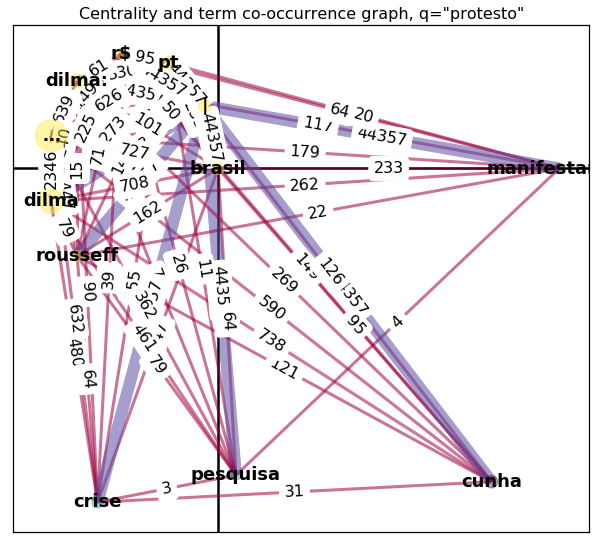

In [ ]:
query = 'protesto'
print "Graph visualization for query:"
plot_graph(wgraph, centrality_layout(wgraph, centrality), 
           plt.figure(figsize=(8,8)), 
           title = u'Centrality and term co-occurrence graph, q="{}"'.format(query))

### n-grams e dispersão lexical

In [ ]:
q = u'dilma'

In [ ]:
tokens = word_tokenize(t_sem_stopwords) 
text = nltk.Text(tokens)
text.concordance(q, width=130, lines=10)

Displaying 10 of 11361 matches:
nca ouviu falar milhões d moradias entregue p casa vida marca dilma médicos agradece demitindo ministro telefone sus morrendo hol
 : tóxica moeda troca política … @ elpais_brasil meta dobrada dilma : casos mensalidades escolares atrasadas dobram # operacaobet
operacaobetalab pepe vargas deixa secretaria direitos humanos dilma : trabalho pet # rt # sdv amaral : 'alvo golpe dilma toda esq
 humanos dilma : trabalho pet # rt # sdv amaral : 'alvo golpe dilma toda esquerda ' amaral : ‘ alvo golpe dilma toda esquerda ’ a
ral : 'alvo golpe dilma toda esquerda ' amaral : ‘ alvo golpe dilma toda esquerda ’ apenas população avaliam ótimo bom nº represe
última trapalhada tentar quebrar espinha pmdb … @ veja cortes dilma : haverá aqui farmácia popular governo : veta financiamento p
 governo : veta financiamento privado campanha facebook igual dilma : toda hora dá pau diferença falido outro não pepe vargas dei
das duplo emprego aceitarem ministérios amaral : ‘ alvo go

In [ ]:
max_items = 50
freq_min_b = 10
freq_min_t = 6

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder2 = nltk.collocations.BigramCollocationFinder.from_words(text)
finder2.apply_word_filter(lambda w: w in string.punctuation)
finder2.apply_freq_filter(freq_min_b)
for a, b in finder2.nbest(bigram_measures.pmi, max_items):
    print a, b

ex-professora filhas
filhas veríssimo
baleia rossi
figure class=
insultos escritor
use protestona
le monde
omite-se festival
see more
arno augustin
ideli salvatti
universitários especializam
vencida use
statu quo
bill clinton
carga tributária
ensaiam coreografia
malvado favorito
mangabeira unger
preferidas leitores
marinha aeronáutica
ampliam habilidades
amazonia beneficiará
drops misto
contagem regressiva
jair onofre
matérias ikeda
beto richa
carestia imposta
buscam aproximação
inércia provocam
colhendo plantou
américa latina
integridade estimular
autoridades ouvidas
destacou objetivos
gráfico atualizado
jul efe-
americana espionou
hospitais universitários
mensalidades escolares
vendeu petralhismo
equipamentos ampliam
trajeto teste
salvatti marido
serviços terceirizados
caderno matérias
'guerrilha bolivariana
bolivariana madurista
sanear amazonia


In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(text)
finder3.apply_word_filter(lambda w: w in string.punctuation)
finder3.apply_ngram_filter(lambda w1, w2, w3:  w1 in ['da', 'de', 'das'])
finder3.apply_freq_filter(freq_min_t)
for a, b, c in finder3.nbest(trigram_measures.pmi, max_items):
    print a, b, c

tido solidez granito
reabilitação dependentes químicos
centros reabilitação dependentes
religião centros reabilitação
petróleo moedas imaginárias
compartilhado uc mini
sugerem término precoce
ex-professora filhas veríssimo
proibir religião centros
prometido trem cumbica
arde fogueira armada
vencida use protestona
tratar hub tam
hd novela gravada
recebida just puro
ruiu completamente aguarda
oea ideli salvatti
caderno matérias ikeda
diluído contagem regressiva
emoticon heart sabia
validade vencida use
hospitais universitários especializam
consumidora promove quebra-quebra
ideli salvatti marido
onze autoridades ouvidas
corpo traficante executado
equipamentos ampliam habilidades
enviado jair onofre
exército marinha aeronáutica
arthur maia sd-ba
icms omite-se festival
sanear amazonia beneficiará
'guerrilha bolivariana madurista
capixabas ensaiam coreografia
princípios pedofilia planos
disparar relógio amanha
reage insultos escritor
veríssimo reage insultos
filhas veríssimo reage
racistas f

In [ ]:
from nltk.util import ngrams
n = 4
xgrams = ngrams(tokens, n)
xgrams_counter = Counter(xgrams)
df_ngrams = pd.DataFrame(xgrams_counter.items(), columns = [u'n-gramas',u'Frequência'])
df_ngrams = df_ngrams.sort_index(by=u'Frequência', ascending=False)
df_ngrams.set_index([u'n-gramas'], inplace=True)
df_ngrams[0:40]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,Frequência
n-gramas,
"(planeja, golpe, stf, anular)",364
"(golpe, stf, anular, decisão)",363
"(stf, anular, decisão, tcu)",363
"(|, http, :, //vejacom)",320
"(anular, decisão, tcu, oposição)",291
"(decisão, tcu, oposição, calada)",288
"(eduardo, cunha, anuncia, rompimento)",278
"(preparam, reação, aliança, renan)",261
"(cunha, preparam, reação, aliança)",260


Nessa célula escolhemos as palavras que vão ser utilizadas na dispersão lexical

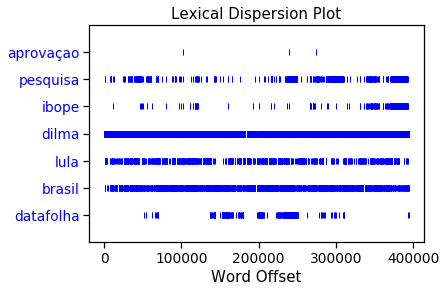

In [ ]:
text.dispersion_plot([u'aprovaçao', 
                      u'pesquisa',
                      u'ibope',
                      u'dilma',
                      u'lula',
                      u'brasil',
                      u'datafolha',
                      ])

Frases mais significativas dos tweets

In [ ]:
manual_list_stop_words = ['só','disse','ser','sobre','ainda','se','além', 'outros','porque','assim','ter', 'access_time', 'more_horiz',
                          'out','jun','publicado','diz','exame','patrocinado','ago','vip','abr','http','vai','HTTP'
                          'jul','jan','abr','set','nov','dez','conteúdo','mar','maio','estadão','marketing','Dilma','pictwittercom','dia','mil','pra',
                          'fev','paulo', 'the','após', 'redação', 'foto', 'feira', 'segundo', 'nesta', 'sexta','contra','governo','dilma'
        'onde','pode','sábado','segunda','três', 'fazer','todos','parte','local', 'região', 'disse','quarta','nova','novo',
        'via','veja','neste','nm','aponta','mostra','rt','vejaabrilcombr','folha','vai','desde','do','multimidia','vejacom','blog', '@','"','...']
stop_words = stopwords.words('portuguese')
for i in manual_list_stop_words:
    stop_words.append(i)

In [ ]:
def score_sentences(sentences, important_words):
    
    CLUSTER_THRESHOLD = 5  
    scores = []
    sentence_idx = -1
   
    for s in [word_tokenize(s) for s in sentences]:    
        sentence_idx += 1
        word_idx = []
        
        for w in important_words:
            try:
              
                word_idx.append(s.index(w))
            except ValueError, e: # w not in this particular sentence
                pass
        word_idx.sort()
     
        if len(word_idx)== 0: continue
        
        clusters = []
        cluster = [word_idx[0]]
        i = 1
        while i < len(word_idx):
            if word_idx[i] - word_idx[i - 1] < CLUSTER_THRESHOLD:
                cluster.append(word_idx[i])
            else:
                clusters.append(cluster[:])
                cluster = [word_idx[i]]
            i += 1
        clusters.append(cluster)
   
        max_cluster_score = 0
        for c in clusters:
            significant_words_in_cluster = len(c)
            total_words_in_cluster = c[-1] - c[0] + 1
            score = 1.0 * significant_words_in_cluster \
                * significant_words_in_cluster / total_words_in_cluster
            if score > max_cluster_score:
                max_cluster_score = score
        scores.append((sentence_idx, score))
    return scores

In [ ]:
def summarize(txt):
    TOP_SENTENCES = 10  
    N = 100  
   
    sentences = [s for s in word_tokenize(txt)]
    normalized_sentences = [s.lower() for s in sentences]
    words = [w.lower() for sentence in normalized_sentences for w in nltk.tokenize.word_tokenize(sentence)]
    fdist = nltk.FreqDist(words)
    top_n_words = [w[0] for w in fdist.items() if w[0] not in stop_words][:N]
    scored_sentences = score_sentences(normalized_sentences, top_n_words)

    avg = np.mean([s[1] for s in scored_sentences])
    std = np.std([s[1] for s in scored_sentences])
    mean_scored = [(sent_idx, score) for (sent_idx, score) in scored_sentences
                   if score > avg + 0.5 * std]
 
    top_n_scored = sorted(scored_sentences, key=lambda s: s[1])[-TOP_SENTENCES:]
    top_n_scored = sorted(top_n_scored, key=lambda s: s[0])
   
    return dict(top_n_summary=[sentences[idx] for (idx, score) in top_n_scored],
                mean_scored_summary=[sentences[idx] for (idx, score) in mean_scored])

In [ ]:
sumarios = summarize(texto_sem_tags)
sumarios['top_n_summary'] = set(sumarios['top_n_summary'])
sumarios['mean_scored_summary'] = set(sumarios['mean_scored_summary'])

print(u'palavras mais importantes(1):\n')
for s in sumarios['top_n_summary']:
    print(u'{}\n'.format(s))
    


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if __name__ == '__main__':


palavras mais importantes(1):

guimar_miguel

assina

igual

necessário

fio

fim

